# Time-series Data Preprocessing Studio.

<span style="background-color: #FFFF00">Garbage in, Garbage out.</span> During data analysis, at first you should put a lot of effort know your data and preprocess it.

There is no ready solution for data preprocessing. So that this notebook was created for you to **INTERACTIVELY** do it. You have to modify the code snippets from time to time to suite **YOUR data and YOUR target**.

Ideally, one should set up their own virtual environment and determine the versions of each library that they are using.

You may use online Jupyter notebook service, but please note: as of Jan 2019, Jupyter Widgets don't work in **Google Colab**. So that the section code of <u>Data Preview in an interactive grid widget</u> NOT working normally. But other code still works.

## Import some basic relevant packages

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Please assign the correct CSV file name according to your need!

In [3]:
csv_file='reviews.csv'
# read in CSV file data
df = pd.read_csv(csv_file)

# First Look at your data
- How many rows are in the dataset?
- How many columns are in this dataset?
- What data types are the columns?
- Is the data complete? Are there nulls? Do we have to infer values?
- What is the definition of these columns?
- What are some other caveats to the data?

In [4]:
# look at data
display(HTML('<b>Head Data</b>'))
display(df.head())

# look a shape of data
display(HTML('<b>Dataframe Shape</b>'))
display(df.shape)

# look at data types. Ideally look at all rows. 
display(HTML('<b>Data Types</b>'))
display(df.iloc[:,:].dtypes)

# see if any columns have nulls. Ideally look at all rows. 
display(HTML('<b>Nulls</b>'))
display(df.iloc[:,:].isnull().any())

# display descriptive statistics
display(HTML('<b>Describe</b>'))
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

# display duplicated index. You may check other columns too
display(HTML('<b>Duplicated</b>'))
df[df.index.duplicated(keep='last')]
#df[df.duplicated('column', keep='last')]

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,344,2016-06-14
3,344,2016-12-30
4,344,2018-08-28


(1226674, 2)

listing_id     int64
date          object
dtype: object

listing_id    False
date          False
dtype: bool

,listing_id
count,1.226674e+06
mean,1.175424e+07
std,7.968547e+06
min,1.090000e+02
25%,4.403905e+06
50%,1.173958e+07
75%,1.829580e+07
85%,2.111148e+07
95%,2.475714e+07
99%,2.823253e+07


,listing_id,date


It is often to set correct index.

In [5]:
# #An example to set to a correct index
# df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)
# df.index=df.set_index(df['date'])
df.index

RangeIndex(start=0, stop=1226674, step=1)

# Profile your data (lengthy but very helpful)
Here, we need a library named as pandas_profiling (https://github.com/pandas-profiling/pandas-profiling), which creates HTML profiling reports from pandas DataFrame objects.

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

C:\Users\Sky\Anaconda3\envs\tfks\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


Number of variables,2
Number of observations,1226674
Total Missing (%),0.0%
Total size in memory,18.7 MiB
Average record size in memory,16.0 B
Numeric,1
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Data Preview in an interactive grid widget

(Only this section does NOT work in **Google Colab**.)

Qgrid is a scrollable grid widget that can be used to edit, sort, and filter DataFrames in Jupyter notebooks. It was developed for use in [Quantopian's hosted research environment](https://www.quantopian.com/notebooks/survey?utm_source=quantopian&amp;utm_medium=web&amp;utm_campaign=qgrid-demo-nb) and also was released as an [open source project on GitHub](https://github.com/quantopian/qgrid).

In [7]:
import qgrid
# set the default max number of rows to 12 so the DataFrame we render with qgrid aren't too tall
qgrid.set_grid_option('maxVisibleRows', 12)
# now render the DataFrame using qgrid
grid=qgrid.show_grid(df, show_toolbar=True)
grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [8]:
#Maybe you did change the df in the grid, such as sort, filter, modification
newdf=grid.get_changed_df()
newdf.head()

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,344,2016-06-14
3,344,2016-12-30
4,344,2018-08-28


Depending on your need, you may assign df=newdf to continue.

In [9]:
#df=newdf

# Clean your data 

## Drop multiple columns
Sometimes, not all columns are useful in our analysis. Therefore, the df.drop comes in handy to drop the selected columns as specified by you.

In [10]:
def drop_multiple_col(col_names_list, df): 
    '''
    AIM    -> Drop multiple columns based on their column names 
    
    INPUT  -> List of column names, df
    
    OUTPUT -> updated df with dropped columns 
    ------
    '''
    df.drop(col_names_list, axis=1, inplace=True)
    return df

#drop_multiple_col("",df)

## Change dtypes
When a dataset gets larger, we need to convert the dtypes in order to save memory. If you’re interested in learning how to use Pandas to deal with large data, I strongly encourage you to check out this article — Why and How to Use Pandas with Large Data(https://towardsdatascience.com/why-and-how-to-use-pandas-with-large-data-9594dda2ea4c).

In [11]:
def change_dtypes(col_int, col_float, df): 
    '''
    AIM    -> Changing dtypes to save memory
     
    INPUT  -> List of column names (int, float), df
    
    OUTPUT -> updated df with smaller memory  
    ------
    '''
    df[col_int] = df[col_int].astype('int32')
    df[col_float] = df[col_float].astype('float32')
    
#change_dtypes(col_int, col_float, df)

## Convert categorical variable to numerical variable
Some machine learning models require variables to be in numerical format. This is when we need to convert categorical variables to numerical variables before feeding them to the models. In terms of data visualization, I’d suggest to retain the categorical variables to have a more explicit interpretation and understanding.

In [13]:
def convert_cat2num(df):
    # Convert categorical variable to numerical variable
    num_encode = {'col_1' : {'YES':1, 'NO':0},
                  'col_2'  : {'WON':1, 'LOSE':0, 'DRAW':0}}  
    df.replace(num_encode, inplace=True)  
    
#convert_cat2num(df)

## Check missing data
If you want to check the number of missing data for each column, this is the fastest way to go with. This gives you a better understanding of which columns have higher number of missing data that determine your next action of data cleaning and analysis.

The reference to deal with missing data can be found https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [14]:
def check_missing_data(df):
    # check for any missing data in the df (display in descending order)
    return df.isnull().sum().sort_values(ascending=False)

check_missing_data(df)

date          0
listing_id    0
dtype: int64

## Remove strings in columns
There might be some time when you’d face the new line character or other weird symbols that appear in your columns of strings. This could easily be dealt with using df['col_1'].replace where col_1 is one of the columns in the dataframe df.

In [15]:
def remove_col_str(df):
    # remove a portion of string in a dataframe column - col_1
    df['col_1'].replace('\n', '', regex=True, inplace=True)
    
    # remove all the characters after &# (including &#) for column - col_1
    df['col_1'].replace(' &#.*', '', regex=True, inplace=True)

#remove_col_str(df)

## Remove white space in columns
Anything is possible when data is messy. It is not uncommon to see there are some white spaces at the beginning of the strings. Thus this approach is useful when you want to remove white spaces at the beginning of the strings in a column.

In [16]:
def remove_col_white_space(df):
    # remove white space at the beginning of string 
    df[col] = df[col].str.lstrip()
#remove_col_white_space(df)

## Concatenate two columns with strings (with condition)
This is helpful when you want to combine two columns with strings conditionally. For instance, you want to concatenate the 1st column with the 2nd column if the strings in the 1st column end with certain letters. The ending letters can also be removed after the concatenation, depending on your needs.

In [17]:
def concat_col_str_condition(df):
    # concat 2 columns with strings if the last 3 letters of the first column are 'pil'
    mask = df['col_1'].str.endswith('pil', na=False)
    col_new = df[mask]['col_1'] + df[mask]['col_2']
    col_new.replace('pil', ' ', regex=True, inplace=True)  # replace the 'pil' with emtpy space
    
#concat_col_str_condition(df)

## Convert timestamp(from string to datetime format)
When dealing with time series data, chances are we’ll encounter timestamp column in string format. This means we may have to convert the string format to datetime format — format to be specified based on our requirement — in order to give meaningful analysis and presentation using the data.

In [19]:
def convert_str_datetime(df): 
    '''
    AIM    -> Convert datetime(String) to datetime(format we want)
     
    INPUT  -> df
    
    OUTPUT -> updated df with new datetime format 
    ------
    '''
    df.insert(loc=2, column='timestamp', value=pd.to_datetime(df.transdate, format='%Y-%m-%d %H:%M:%S.%f')) 

#convert_str_datetime(df)

## Other Cleaning (Sample only)

In [25]:
# Rename columns
df = df.rename(columns = {'date': 'ds', 'listing_id': 'ts'})

# Group data by number of listings per date
df_processed = df.groupby(by = 'ds').agg({'ts': 'count'})

display(df_processed.index)

# Change index to datetime
df_processed.index = pd.to_datetime(df_processed.index)

# Set frequency of time series
df_processed = df_processed.asfreq(freq='1D')

# Sort the values
df_processed = df_processed.sort_index(ascending = True)

Index(['2009-05-26', '2009-06-01', '2009-06-24', '2009-07-23', '2009-07-29',
       '2009-08-13', '2009-08-23', '2009-08-30', '2009-09-02', '2009-09-03',
       ...
       '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01',
       '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06'],
      dtype='object', name='ds', length=3144)

In [26]:
df_processed=df_processed.dropna()
#df_processed.count()

In [ ]:
df_processed.index

Have you **changed** the df after loading?

In [22]:
#df_processed=df # If you didn't change the df

# Data Preview in Chart
- There may appear to be an overall increasing trend. 
- There may appear to be some differences in the variance over time. 
- There may be some seasonality (i.e., cycles) in the data.
- There may be some outliers.

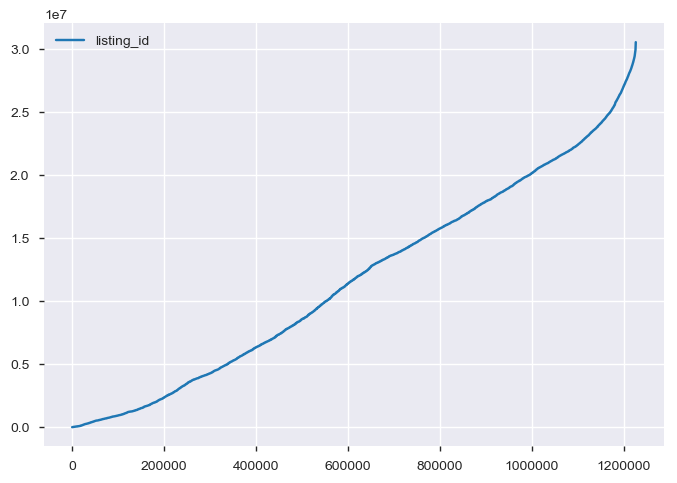

In [23]:
df_processed.plot.line() #line plot (default)
# df_processed.plot.bar() #vertical bar plot
# df_processed.plot.barh() #horizontal bar plot
# df_processed.plot.hist() #histogram
# df_processed.plot.box() #boxplot
# df_processed.plot.kde() #Kernel Density Estimation plot
# df_processed.plot.density() #same as ‘kde’
# df_processed.plot.area() #area plot
# df_processed.plot.pie() #pie plot
# df_processed.plot.scatter() #scatter plot
# df_processed.plot.hexbin() #hexbin plot

# Deal with stationarity
Most time-series models assume that the underlying time-series data is **stationary**.  This assumption gives us some nice statistical properties that allows us to use various models for forecasting.

**Stationarity** is a statistical assumption that a time-series has:
*   **Constant mean**
*   **Constant variance**
*   **Autocovariance does not depend on time**

More simply put, if we are using past data to predict future data, we should assume that the data will follow the same general trends and patterns as in the past.  This general statement holds for most training data and modeling tasks.

**There are some good diagrams and explanations on stationarity [here](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/) and [here](https://people.duke.edu/~rnau/411diff.htm).**

Sometimes we need to transform the data in order to make it stationary.  However, this  transformation then calls into question if this data is truly stationary and is suited to be modeled using these techniques.

We will use **Dickey-Fuller test** to check wheather the time series is stationary or not.

Reference: Test stationarity using moving average statistics and Dickey-Fuller test (https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df_ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df_ts.rolling(window = 12, center = False).mean()
    rolstd = df_ts.rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df_ts, 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df_ts, 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    
    if (dftest[1]>0.05):
        print("The time series is NOT stationary at the p = 0.05 level.")
    else:
        print("The time series is stationary at the p = 0.05 level.")
                    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Adfuller and most other tsa functions cannot handle missing values.

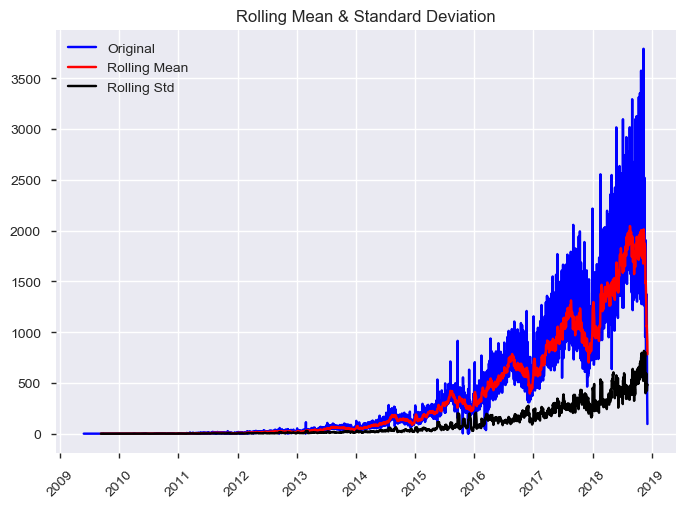

Results of Dickey-Fuller Test:
The time series is NOT stationary at the p = 0.05 level.
Test Statistic                   -1.606645
p-value                           0.480255
# Lags Used                      29.000000
Number of Observations Used    3114.000000
Critical Value (1%)              -3.432452
Critical Value (5%)              -2.862469
Critical Value (10%)             -2.567264
dtype: float64


In [27]:
ts=df_processed['ts']  # You may replace this with your series
test_stationarity(ts)

## Correct for stationarity

It is common for time series data to have to correct for non-stationarity. 

2 common reasons behind non-stationarity are:

1. **Trend** – mean is not constant over time.
2. **Seasonality** – variance is not constant over time.

There are ways to correct for trend and seasonality, to make the time series stationary.
**What happens if you do not correct for these things?**

Many things can happen, including:
- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  

Here are some resources on the pitfalls of using traditional methods for time series analysis.  
[Quora link](https://www.quora.com/Why-cant-you-use-linear-regression-for-time-series-data)  
[Quora link](https://www.quora.com/Data-Science-Can-machine-learning-be-used-for-time-series-analysis)

### Eliminating trend and seasonality
*   **Transformation**
  *   *Examples.* Log, square root, etc.
*   **Smoothing**
  *  *Examples.* Weekly average, monthly average, rolling averages.
*   **Differencing**
  *  *Examples.* First-order differencing.
*   **Polynomial Fitting**
  *  *Examples.* Fit a regression model.
*   **Decomposition: trend, seasonality, residuals**

Here we use Decomposition.

In [28]:
def plot_decomposition(df, ts, trend, seasonal, residual):
  """
  Plot time series data
  """
  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

  ax1.plot(df[ts], label = 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis = 'x', rotation = 45)

  ax2.plot(df[trend], label = 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis = 'x', rotation = 45)

  ax3.plot(df[seasonal],label = 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis = 'x', rotation = 45)

  ax4.plot(df[residual], label = 'Residuals')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis = 'x', rotation = 45)
  plt.tight_layout()

  # Show graph
  plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
               x = 0.5, 
               y = 1.05, 
               fontsize = 18)
  plt.show()
  plt.close()
  
  return

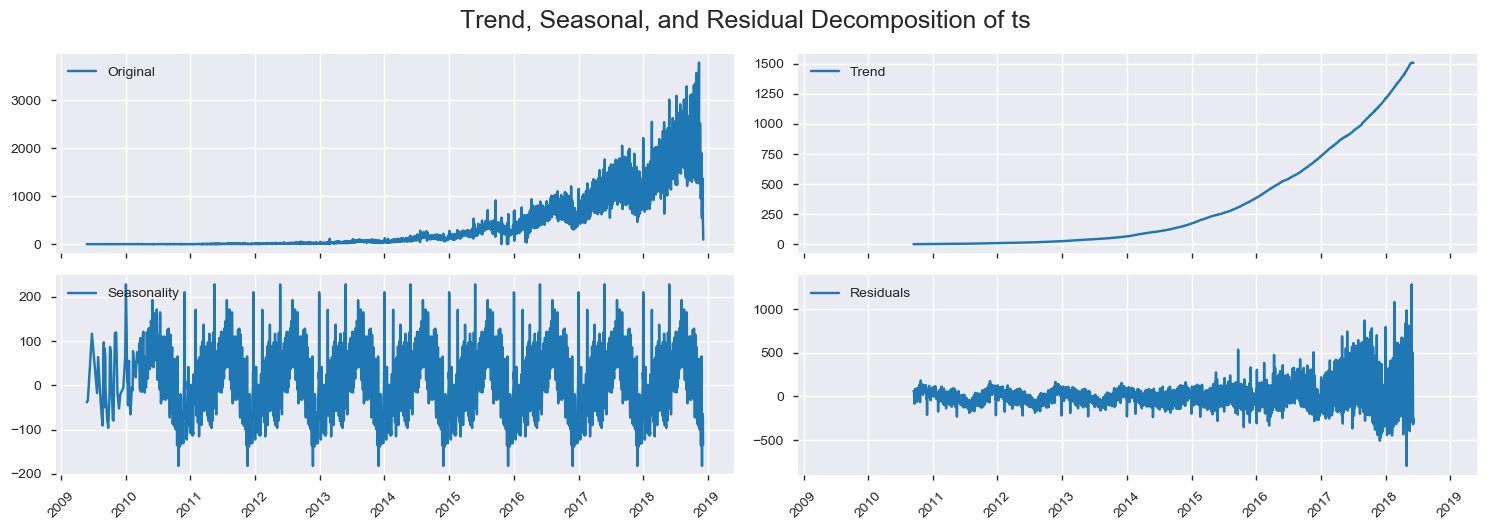

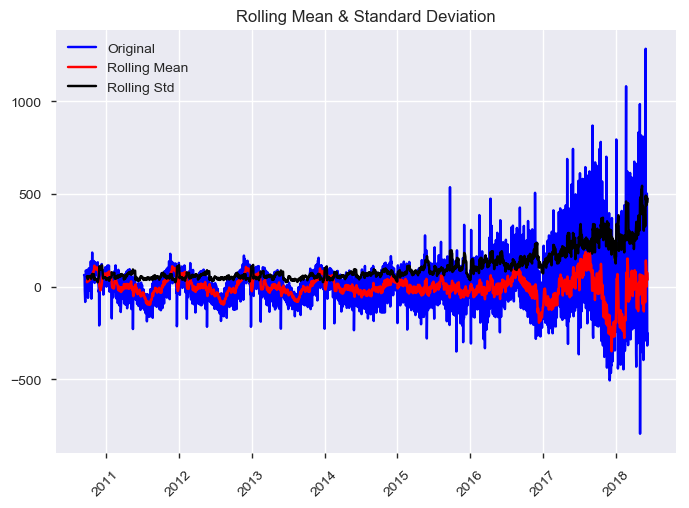

Results of Dickey-Fuller Test:
The time series is stationary at the p = 0.05 level.
Test Statistic                   -5.064331
p-value                           0.000017
# Lags Used                      22.000000
Number of Observations Used    2757.000000
Critical Value (1%)              -3.432724
Critical Value (5%)              -2.862589
Critical Value (10%)             -2.567328
dtype: float64


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_processed['ts'], freq = 365)

df_processed.loc[:,'trend'] = decomposition.trend
df_processed.loc[:,'seasonal'] = decomposition.seasonal
df_processed.loc[:,'residual'] = decomposition.resid

plot_decomposition(df_processed, 
                   ts = 'ts', 
                   trend = 'trend',
                   seasonal = 'seasonal', 
                   residual = 'residual')

display(HTML("<b>The stationarity test of residual:</b>"))
test_stationarity(df_processed.dropna()['residual'])

# After Preprocessing

Additional data considerations before choosing a model
*   Whether or not to incorporate external data
*   Whether or not to keep as univariate or multivariate (i.e., which features and number of features)
*   Outlier detection and removal
*   Missing value imputation

## Statistical models
*   **Ignore the time-series aspect completely and model using traditional statistical modeling toolbox.** 
  *   *Examples.* Regression-based models.  
*   **Univariate statistical time-series modeling.**
  *   *Examples.* Averaging and smoothing models, ARIMA models.
*   **Slight modifications to univariate statistical time-series modeling.**
  *    *Examples.* External regressors, multi-variate models.
*   **Additive or component models.**
  *  *Examples.* Facebook Prophet package.
*   **Structural time series modeling.**
  *    *Examples.* Bayesian structural time series modeling, hierarchical time series modeling.

  ### ARIMA models.
You may use ARIMA models when we know there is dependence between values and leverage that information to forecast.

**ARIMA = Auto-Regressive Integrated Moving Average**.   
Assumptions: The time-series is stationary.  
Depends on:
 1. Number of AR (Auto-Regressive) terms (p).
 2. Number of I (Integrated or Difference) terms (d).
 3. Number of MA (Moving Average) terms (q). 
  
 ### Facebook Prophet package.
[Facebook Prophet](https://facebook.github.io/prophet/), a tool that allows folks to forecast using additive or component models relatively easily.  It can also include things like:
* Day of week effects
* Day of year effects
* Holiday effects
* Trend trajectory
* Can do MCMC sampling

## Machine Learning.
*   **Ignore the time-series aspect completely and model using traditional machine learning modeling toolbox.** 
  *   *Examples.* Support Vector Machines (SVMs), Random Forest Regression, Gradient-Boosted Decision Trees (GBDTs).
*   **Hidden markov models (HMMs).**
*   **Other sequence-based models.**
*   **Gaussian processes (GPs).**
*   **Recurrent neural networks (RNNs).**

### Sklearn scalers
In the preprocessing, you may want to scale your original data.
sklearn provides the following scalers:
StandardScaler
MinMaxScaler
MaxAbsScaler
RobustScaler
PowerTransformer
QuantileTransformer (Gaussian output)
QuantileTransformer (uniform output)
Normalizer

Reference: Compare the effect of different scalers on data with outliers
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html 

# Credit
Part code is modified from 
1. Applying statistical modeling and machine learning to perform time-series forecasting (https://goo.gl/r7CFcN). by Tamara Louie in PyData LA  October 2018 

2. The Simple Yet Practical Data Cleaning Codes - To solve the common scenarios of messy data (https://towardsdatascience.com/the-simple-yet-practical-data-cleaning-codes-ad27c4ce0a38) by Admond Lee, Jan 11 2019
